In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, VarianceThreshold

In [75]:
url='https://raw.githubusercontent.com/Nantha-1998/404-CODER/master/career_compute_dataset.csv'

career_dataset = pd.read_csv(url)
#pd.read_csv("../Datasets/career_pred.csv")

# 1.) Exploratory Data Analysis

In [76]:
career_dataset.head()

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,...,1,3,1,2,2,4,3,4,5,Technical Support
1,3,1,2,2,2,1,1,3,2,4,...,2,3,2,3,2,5,3,3,4,Software Developer
2,3,4,2,2,1,1,1,2,3,3,...,1,4,3,1,4,3,3,3,4,UI/UX Designer
3,3,4,2,1,1,1,1,1,3,2,...,1,3,2,1,2,1,4,4,3,Technical Support
4,2,3,2,4,1,1,1,4,3,3,...,1,2,1,3,1,5,4,3,1,Data Analyst


In [77]:
career_dataset.shape

(7525, 26)

In [78]:
career_dataset.columns

Index(['sslc', 'hsc', 'cgpa', 'school_type', 'no_of_miniprojects',
       'no_of_projects', 'coresub_skill', 'aptitude_skill',
       'problemsolving_skill', 'programming_skill', 'abstractthink_skill',
       'design_skill', 'first_computer', 'first_program', 'lab_programs',
       'ds_coding', 'technology_used', 'sympos_attend', 'sympos_won',
       'extracurricular', 'learning_style', 'college_bench',
       'clg_teachers_know', 'college_performence ', 'college_skills', 'ROLE'],
      dtype='object')

In [79]:
career_dataset.describe()

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,lab_programs,ds_coding,technology_used,sympos_attend,sympos_won,extracurricular,college_bench,clg_teachers_know,college_performence,college_skills
count,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,...,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000
mean,2.907243,3.043056,2.138738,1.799070,1.537276,1.188439,1.513223,2.041196,2.863256,2.887442,...,3.584585,2.050498,1.204917,2.856877,1.972359,2.182990,3.988040,3.597874,3.350299,2.995748
std,0.939084,0.900414,0.803465,0.711248,0.735916,0.545728,0.499858,1.085477,0.728428,0.754894,...,0.790142,0.748276,0.574120,1.027328,1.002539,1.094488,0.778578,0.565860,0.522819,1.409500
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,4.000000,2.000000,1.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,...,4.000000,2.000000,1.000000,3.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.000000
75%,4.000000,4.000000,3.000000,2.000000,2.000000,1.000000,2.000000,3.000000,3.000000,3.000000,...,4.000000,2.000000,1.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,5.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000


In [80]:
career_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7525 entries, 0 to 7524
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sslc                  7525 non-null   int64 
 1   hsc                   7525 non-null   int64 
 2   cgpa                  7525 non-null   int64 
 3   school_type           7525 non-null   int64 
 4   no_of_miniprojects    7525 non-null   int64 
 5   no_of_projects        7525 non-null   int64 
 6   coresub_skill         7525 non-null   int64 
 7   aptitude_skill        7525 non-null   int64 
 8   problemsolving_skill  7525 non-null   int64 
 9   programming_skill     7525 non-null   int64 
 10  abstractthink_skill   7525 non-null   int64 
 11  design_skill          7525 non-null   int64 
 12  first_computer        7525 non-null   int64 
 13  first_program         7525 non-null   int64 
 14  lab_programs          7525 non-null   int64 
 15  ds_coding             7525 non-null   

In [81]:
career_dataset.isnull().sum()

sslc                       0
hsc                        0
cgpa                       0
school_type                0
no_of_miniprojects         0
no_of_projects             0
coresub_skill              0
aptitude_skill             0
problemsolving_skill       0
programming_skill          0
abstractthink_skill        0
design_skill               0
first_computer             0
first_program              0
lab_programs               0
ds_coding                  0
technology_used            0
sympos_attend              0
sympos_won                 0
extracurricular            0
learning_style             0
college_bench              0
clg_teachers_know          0
college_performence        0
college_skills             0
ROLE                    7476
dtype: int64

In [126]:
career_dataset['ROLE'].value_counts()

Software Developer    12
Technical Support     10
Web Developer          7
Technical Writer       6
Software Tester        4
Business Analyst       4
UI/UX Designer         3
Data Analyst           3
Name: ROLE, dtype: int64

In [128]:
career_dataset.isnull().sum()

sslc                       0
hsc                        0
cgpa                       0
school_type                0
no_of_miniprojects         0
no_of_projects             0
coresub_skill              0
aptitude_skill             0
problemsolving_skill       0
programming_skill          0
abstractthink_skill        0
design_skill               0
first_computer             0
first_program              0
lab_programs               0
ds_coding                  0
technology_used            0
sympos_attend              0
sympos_won                 0
extracurricular            0
learning_style             0
college_bench              0
clg_teachers_know          0
college_performence        0
college_skills             0
ROLE                    7476
dtype: int64

In [82]:
X = career_dataset.iloc[:,:-1]
y = pd.DataFrame(career_dataset.iloc[:,-1])

In [83]:
X

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,ds_coding,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills
0,2,3,2,3,1,1,1,1,2,4,...,1,1,3,1,2,2,4,3,4,5
1,3,1,2,2,2,1,1,3,2,4,...,2,2,3,2,3,2,5,3,3,4
2,3,4,2,2,1,1,1,2,3,3,...,1,1,4,3,1,4,3,3,3,4
3,3,4,2,1,1,1,1,1,3,2,...,2,1,3,2,1,2,1,4,4,3
4,2,3,2,4,1,1,1,4,3,3,...,2,1,2,1,3,1,5,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,3,2,1,2,1,1,2,2,3,3,...,4,1,4,2,2,1,4,4,3,3
7521,2,3,3,3,4,3,2,1,3,3,...,3,4,2,3,2,4,1,3,3,2
7522,3,2,1,2,1,1,1,2,2,3,...,2,1,3,1,1,3,5,3,3,4
7523,2,1,1,1,2,1,1,2,2,2,...,2,1,3,2,1,2,4,4,3,4


In [84]:
y

,ROLE
0,Technical Support
1,Software Developer
2,UI/UX Designer
3,Technical Support
4,Data Analyst
...,...
7520,NaN
7521,NaN
7522,NaN
7523,NaN


In [85]:
lable_encoder = LabelEncoder()

In [86]:
for feature in X.columns[9:]:
  X[feature] = lable_encoder.fit_transform(X[feature])

In [87]:
# y['Suggested Job Role'] = lable_encoder.fit_transform(y['Suggested Job Role'])
y['ROLE'] = lable_encoder.fit_transform(y['ROLE'])

In [88]:
X.head()

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,ds_coding,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills
0,2,3,2,3,1,1,1,1,2,3,...,0,0,2,0,1,1,3,2,3,4
1,3,1,2,2,2,1,1,3,2,3,...,1,1,2,1,2,1,4,2,2,3
2,3,4,2,2,1,1,1,2,3,2,...,0,0,3,2,0,3,2,2,2,3
3,3,4,2,1,1,1,1,1,3,1,...,1,0,2,1,0,1,0,3,3,2
4,2,3,2,4,1,1,1,4,3,2,...,1,0,1,0,2,0,4,3,2,0


In [89]:
y.head()

,ROLE
0,4
1,2
2,6
3,4
4,1


# 2.) Feature Selection

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [91]:
X_train.head()

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,ds_coding,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills
3570,2,3,2,1,1,1,2,1,3,2,...,1,0,2,2,1,2,2,3,2,1
1937,3,3,1,1,1,1,1,2,3,2,...,0,0,2,0,2,1,2,3,2,0
7420,4,4,3,1,1,1,2,1,4,3,...,2,0,3,1,1,1,3,3,3,3
6344,4,3,2,1,1,1,1,2,3,1,...,1,0,2,1,0,1,4,2,2,0
857,4,4,4,1,2,1,2,3,3,2,...,1,1,2,2,2,0,4,3,3,3


In [92]:
y_train.head()

,ROLE
3570,8
1937,8
7420,8
6344,8
857,8


In [93]:
variance_threshold = VarianceThreshold(threshold=0)
vt_features = variance_threshold.fit(X_train)
vt_features.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [94]:
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([0.01551609, 0.        , 0.00620161, 0.01963929, 0.02435566,
       0.03246952, 0.02282989, 0.01645928, 0.00016341, 0.01394641,
       0.01520673, 0.0133436 , 0.01737196, 0.01280814, 0.01200329,
       0.0160448 , 0.00041896, 0.02244967, 0.00043949, 0.        ,
       0.00749125, 0.        , 0.00815236, 0.01154979, 0.00281174])

In [95]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info

sslc                    0.015516
hsc                     0.000000
cgpa                    0.006202
school_type             0.019639
no_of_miniprojects      0.024356
no_of_projects          0.032470
coresub_skill           0.022830
aptitude_skill          0.016459
problemsolving_skill    0.000163
programming_skill       0.013946
abstractthink_skill     0.015207
design_skill            0.013344
first_computer          0.017372
first_program           0.012808
lab_programs            0.012003
ds_coding               0.016045
technology_used         0.000419
sympos_attend           0.022450
sympos_won              0.000439
extracurricular         0.000000
learning_style          0.007491
college_bench           0.000000
clg_teachers_know       0.008152
college_performence     0.011550
college_skills          0.002812
dtype: float64

In [96]:
features_dataframe = pd.DataFrame(mutual_info, index=mutual_info.index, columns=['Mutual Information'])
features_dataframe

,Mutual Information
sslc,0.015516
hsc,0.000000
cgpa,0.006202
school_type,0.019639
no_of_miniprojects,0.024356
no_of_projects,0.032470
coresub_skill,0.022830
aptitude_skill,0.016459
problemsolving_skill,0.000163
programming_skill,0.013946


In [97]:
import plotly.express as px

In [98]:
fig =px.bar(features_dataframe, x=features_dataframe.index,y='Mutual Information')
fig.show()

<BarContainer object of 25 artists>

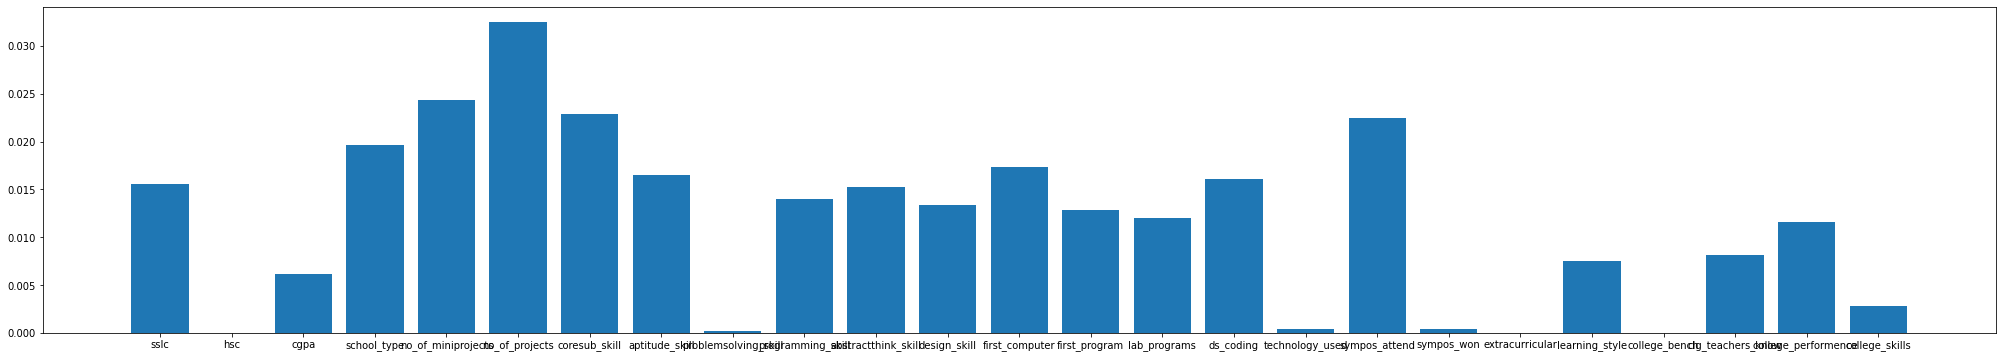

In [99]:
plt.figure(figsize=(35,6))
plt.bar(x=X_train.columns,height=mutual_info)

In [100]:
important_features = {}

In [101]:
for value in enumerate(mutual_info):
  if value[1] > 0:
    important_features[value[0]] = value[1]

In [102]:
important_features

{0: 0.015516087736878736,
 2: 0.0062016072400907785,
 3: 0.01963928834391737,
 4: 0.02435566023677571,
 5: 0.032469518037338996,
 6: 0.022829892491039616,
 7: 0.016459275650571814,
 8: 0.0001634135321665342,
 9: 0.013946412806967845,
 10: 0.015206731297813691,
 11: 0.013343595152716659,
 12: 0.01737196235598304,
 13: 0.012808142190427696,
 14: 0.012003294798236253,
 15: 0.0160447975381931,
 16: 0.0004189640898520919,
 17: 0.02244967242564322,
 18: 0.00043948689026562793,
 20: 0.0074912494154456555,
 22: 0.008152356065096233,
 23: 0.011549785285943748,
 24: 0.0028117383138926977}

In [103]:
important_features = mutual_info[important_features]

In [104]:
important_features

sslc                    0.015516
cgpa                    0.006202
school_type             0.019639
no_of_miniprojects      0.024356
no_of_projects          0.032470
coresub_skill           0.022830
aptitude_skill          0.016459
problemsolving_skill    0.000163
programming_skill       0.013946
abstractthink_skill     0.015207
design_skill            0.013344
first_computer          0.017372
first_program           0.012808
lab_programs            0.012003
ds_coding               0.016045
technology_used         0.000419
sympos_attend           0.022450
sympos_won              0.000439
learning_style          0.007491
clg_teachers_know       0.008152
college_performence     0.011550
college_skills          0.002812
dtype: float64

In [105]:
important_features.sort_values(inplace=True,ascending=False)

In [106]:
important_features

no_of_projects          0.032470
no_of_miniprojects      0.024356
coresub_skill           0.022830
sympos_attend           0.022450
school_type             0.019639
first_computer          0.017372
aptitude_skill          0.016459
ds_coding               0.016045
sslc                    0.015516
abstractthink_skill     0.015207
programming_skill       0.013946
design_skill            0.013344
first_program           0.012808
lab_programs            0.012003
college_performence     0.011550
clg_teachers_know       0.008152
learning_style          0.007491
cgpa                    0.006202
college_skills          0.002812
sympos_won              0.000439
technology_used         0.000419
problemsolving_skill    0.000163
dtype: float64

In [107]:
X_train = X_train[important_features.index[0:11]]

In [108]:
X_train.head()

,no_of_projects,no_of_miniprojects,coresub_skill,sympos_attend,school_type,first_computer,aptitude_skill,ds_coding,sslc,abstractthink_skill,programming_skill
3570,1,1,2,2,1,0,1,1,2,1,2
1937,1,1,1,2,1,0,2,0,3,0,2
7420,1,1,2,3,1,1,1,2,4,2,3
6344,1,1,1,2,1,0,2,1,4,1,1
857,1,2,2,2,1,1,3,1,4,1,2


In [109]:
X_train.shape

(5041, 11)

In [110]:
X_test = X_test[important_features.index[0:11]]

In [111]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [112]:
dt_prediction_train = dt_model.predict(X_train)
dt_prediction_test = dt_model.predict(X_test)

In [113]:
print("On Training Data: ",accuracy_score(y_train,dt_prediction_train))
print("On Test Data: ",accuracy_score(y_test,dt_prediction_test))

On Training Data:  0.9978178932751438
On Test Data:  0.9738325281803543


In [114]:
X_train

,no_of_projects,no_of_miniprojects,coresub_skill,sympos_attend,school_type,first_computer,aptitude_skill,ds_coding,sslc,abstractthink_skill,programming_skill
3570,1,1,2,2,1,0,1,1,2,1,2
1937,1,1,1,2,1,0,2,0,3,0,2
7420,1,1,2,3,1,1,1,2,4,2,3
6344,1,1,1,2,1,0,2,1,4,1,1
857,1,2,2,2,1,1,3,1,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...
905,1,1,2,2,1,0,1,0,4,1,2
5192,1,2,2,1,3,1,4,1,2,2,1
3980,1,3,2,1,2,1,2,2,4,2,2
235,1,1,2,0,2,1,2,1,4,1,2


In [115]:
# feature_selector = SelectKBest(score_func=chi2,k=11)
# feature_selector.fit(X_train,y_train)
# X_train_fs= feature_selector.transform(X_train)
# X_test_fs= feature_selector.transform(X_test)

In [116]:
# len(feature_selector.scores_)

In [117]:
# career_dataset.shape[1]

In [118]:
import xgboost as xgb

In [119]:
xgb_model = xgb.XGBClassifier()

In [120]:
 
xgb_model.fit(X_train, y_train)
xgb_y_pred  = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_y_pred)
print("accuracy=",xgb_accuracy*100)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[19:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy= 99.51690821256038


In [121]:
from sklearn.ensemble import RandomForestClassifier
rf_model  = RandomForestClassifier()

In [122]:
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_train)
pred1 = rf_model.predict(X_test)
print("Train ",accuracy_score(y_train,pred))
print("Test ",accuracy_score(y_test,pred1))




C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_3032/2477665720.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Train  0.9978178932751438
Test  0.9947665056360708


In [123]:
confusion_matrix(y_test,pred1)

array([[   0,    0,    0,    0,    0,    0,    0,    3],
       [   0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0,    0,    0,    3],
       [   0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    1,    0,    1, 2471]], dtype=int64)

In [124]:
classification_report(y_test,pred1).split('\n')

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



['              precision    recall  f1-score   support',
 '',
 '           0       0.00      0.00      0.00         3',
 '           1       0.00      0.00      0.00         1',
 '           3       0.00      0.00      0.00         1',
 '           4       0.00      0.00      0.00         3',
 '           5       0.00      0.00      0.00         1',
 '           6       0.00      0.00      0.00         1',
 '           7       0.00      0.00      0.00         1',
 '           8       1.00      1.00      1.00      2473',
 '',
 '    accuracy                           0.99      2484',
 '   macro avg       0.12      0.12      0.12      2484',
 'weighted avg       0.99      0.99      0.99      2484',
 '']